In [1]:
from msmarco.download import minimarco
from time import perf_counter
import numpy as np
import pandas as pd
from msmarco.evaluate import grade_results, judge_queries

minmarco_mrr10 = [0] * 5
REBUILD=False
NUM_QUERIES = 1000
NUM_UNRELS = 100

In [2]:
minim, minim_judgments = minimarco(num_queries=NUM_QUERIES, num_unrels=NUM_UNRELS, rebuild=REBUILD)
minim

Rebuilding minimarco w/ 1000 queries and 100 unrels per query.
Saved 100953 rows to /Users/douglas.turnbull/.msmarco/minimarco_q1000_u100.pkl
Saved 1000 rows to /Users/douglas.turnbull/.msmarco/minimarco_q1000_u100_queries.pkl


,msmarco_id,url,title,body
0,D312959,https://en.wikipedia.org/wiki/Visual_cortex,Visual cortex,"From Wikipedia, the free encyclopedianavigatio..."
1,D140227,http://www.webmd.com/depression/electroconvuls...,Electroconvulsive Therapy (ECT),Electroconvulsive Therapy (ECT)Treatment Overv...
2,D213890,https://en.wikipedia.org/wiki/Cholera,Cholera,"From Wikipedia, the free encyclopedianavigatio..."
3,D1033338,https://answers.yahoo.com/question/index?qid=2...,The ABO blood type system in humans is an exam...,Science & Mathematics Biology The ABO blood ty...
4,D508131,http://www.healthline.com/health/beriberi,What is beriberi?,What is beriberi? Beriberi is a disease caused...
...,...,...,...,...
1564639,D624096,https://www.mapquest.com/us/ut/midvale-282041707,Midvale,"Midvale Midvale, UTFavorite Share More Nearby ..."
1830048,D1793592,http://composertools.com/Dictionary/MusicWords...,Talking About Music â A Dictionary,Menu Home Tools Theory Dictionary About Contact
1419526,D2455651,https://www.volvoclub.org.uk/press/releases/20...,Volvo XC60 Plug-in Hybrid Concept - a unique b...,Volvo XC60 Plug-in Hybrid Concept - a unique b...
1210591,D678355,https://www.facebook.com/Young-Yu-Tae-Kwon-Do-...,Young Yu Tae Kwon DoMartial Arts School in Gre...,Home About Photos Reviews Events Videos Posts ...


In [3]:
minim_judgments

,query_id,query,msmarco_id
0,3,another name for the primary visual cortex is,D312959
1,5,ect is a treatment that is used for,D140227
2,12,rice-water stools are associated with disease...,D213890
3,15,the abo blood types are examples of,D1033338
4,16,the vitamin that prevents beriberi is,D508131
...,...,...,...
995,4806,ketamine infusion side effects,D806650
996,4810,kirby puckett baseball cards value,D999913
997,4811,klinefelter syndrome is an consequence of what...,D732799
998,4826,lasa catagories,D1424340


In [4]:
from searcharray import SearchArray
from msmarco.tokenizers import snowball_tokenizer

minim['title_snowball'] = SearchArray.index(minim['title'], tokenizer=snowball_tokenizer)
minim['body_snowball'] = SearchArray.index(minim['body'], tokenizer=snowball_tokenizer)

minim

,msmarco_id,url,title,body,title_snowball,body_snowball
0,D312959,https://en.wikipedia.org/wiki/Visual_cortex,Visual cortex,"From Wikipedia, the free encyclopedianavigatio...","Terms({'visual', 'cortex'})","Terms({'rostral', 'lui', 'model', 'retinotop',..."
1,D140227,http://www.webmd.com/depression/electroconvuls...,Electroconvulsive Therapy (ECT),Electroconvulsive Therapy (ECT)Treatment Overv...,"Terms({'electroconvuls', 'therapi', 'ect'})","Terms({'reliev', 'nation', 'nice', 'ill', 'inc..."
2,D213890,https://en.wikipedia.org/wiki/Cholera,Cholera,"From Wikipedia, the free encyclopedianavigatio...",Terms({'cholera'}),"Terms({'toll', 'incub', 'look', '21142690', 'm..."
3,D1033338,https://answers.yahoo.com/question/index?qid=2...,The ABO blood type system in humans is an exam...,Science & Mathematics Biology The ABO blood ty...,"Terms({'exampl', 'blood', 'is', 'in', 'type', ...","Terms({'ib', '0', 'c', 'you', 'rate', 'd', 'co..."
4,D508131,http://www.healthline.com/health/beriberi,What is beriberi?,What is beriberi? Beriberi is a disease caused...,"Terms({'is', 'beriberi', 'what'})","Terms({'you', 'look', 'should', 'sprout', 'lim..."
...,...,...,...,...,...,...
1564639,D624096,https://www.mapquest.com/us/ut/midvale-282041707,Midvale,"Midvale Midvale, UTFavorite Share More Nearby ...",Terms({'midval'}),"Terms({'11188833', 'utah', 'nearbi', 'it', 'bu..."
1830048,D1793592,http://composertools.com/Dictionary/MusicWords...,Talking About Music â A Dictionary,Menu Home Tools Theory Dictionary About Contact,"Terms({'about', 'dictionari', 'â', 'a', 'music...","Terms({'about', 'menu', 'dictionari', 'home', ..."
1419526,D2455651,https://www.volvoclub.org.uk/press/releases/20...,Volvo XC60 Plug-in Hybrid Concept - a unique b...,Volvo XC60 Plug-in Hybrid Concept - a unique b...,"Terms({'concept', 'uniqu', 'and', 'electr', 'h...","Terms({'23', '0', 'research', 'park', 'you', '..."
1210591,D678355,https://www.facebook.com/Young-Yu-Tae-Kwon-Do-...,Young Yu Tae Kwon DoMartial Arts School in Gre...,Home About Photos Reviews Events Videos Posts ...,"Terms({'greensboro', 'young', 'kwon', 'art', '...","Terms({'23', 'communiti', 'goalcast', 'you', '..."


In [5]:
def or_query_search(corpus, fields, query, query_id=None, n=10):
    if not isinstance(fields, list):
        fields = [fields]
    start = perf_counter()
    scored = np.zeros(len(corpus))
    for field in fields:
        boost = 1.0
        if '^' in field:
            field, boost = field.split('^')
            boost = float(boost)
        tokenizer = corpus[field].array.tokenizer
        tokens = tokenizer(query)
        scored += (np.sum([corpus[field].array.score(token) for token in tokens], axis=0) * boost)
    took = perf_counter() - start
    
    top_n_idx = np.argsort(scored)[::-1][:n]
    scores = scored[top_n_idx]
    top_n_idx, scores

    top_n = corpus[['title', 'msmarco_id']].iloc[top_n_idx]
    top_n['scores'] = scores
    top_n['query'] = query
    top_n['query_id'] = query_id
    top_n['took'] = took
    top_n['rank'] = np.arange(n) + 1
    return top_n

or_query_search(corpus=minim, fields="title_snowball", query="cheese inside")

,title,msmarco_id,scores,query,query_id,took,rank
419477,Goat cheese,D563011,4.310132,cheese inside,None,0.001259,1
2075897,Cream cheese,D137534,4.310132,cheese inside,None,0.001259,2
123537,Lucerne Cheese,D1718607,4.310132,cheese inside,None,0.001259,3
151693,Parmesan Cheese,D2296067,4.310132,cheese inside,None,0.001259,4
1739907,Cheese Enchiladas,D375384,4.310132,cheese inside,None,0.001259,5
1083107,Insider Trading,D828149,4.264781,cheese inside,None,0.001259,6
110529,Market Insider,D945309,4.264781,cheese inside,None,0.001259,7
1325090,Classic Cheese Blintzes,D2898956,3.917872,cheese inside,None,0.001259,8
1713027,Sliced American Cheese,D2846574,3.917872,cheese inside,None,0.001259,9
2937311,Cheese Zinc Content,D2869014,3.917872,cheese inside,None,0.001259,10


## Title search

Just search title w/ BM25

In [6]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim, fields='title_snowball', query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
results

,title,msmarco_id,scores,query,query_id,took,rank
0,Visual cortex,D312959,10.500903,another name for the primary visual cortex is,3,0.003284,1
2151543,What Is the Primary Cortex?,D1669220,10.240697,another name for the primary visual cortex is,3,0.003284,2
341069,What is another name for Google?,D63802,7.670299,another name for the primary visual cortex is,3,0.003284,3
2874107,What is the Motor Cortex?,D1476087,6.722530,another name for the primary visual cortex is,3,0.003284,4
2429411,Somatosensory Cortex,D1883627,5.849012,another name for the primary visual cortex is,3,0.003284,5
...,...,...,...,...,...,...,...
2808831,Final Exam Schedule,D1869217,3.750164,lgps definition final salary,4829,0.001045,6
2672132,Final Fantasy XV,D1911108,3.750164,lgps definition final salary,4829,0.001045,7
2355768,Psychology Final Exam,D1881170,3.750164,lgps definition final salary,4829,0.001045,8
2959487,Test 3 (Final),D347332,3.750164,lgps definition final salary,4829,0.001045,9


In [7]:
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[0] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[0]

0.43009761904761906

## Body search

In [8]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim, fields='body_snowball', query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
results

,title,msmarco_id,scores,query,query_id,took,rank
1990202,Chapter 5 â Basic Cerebral Cortex Function wit...,D542498,11.626477,another name for the primary visual cortex is,3,0.004619,1
0,Visual cortex,D312959,11.560096,another name for the primary visual cortex is,3,0.004619,2
198524,area,D1989090,10.830662,another name for the primary visual cortex is,3,0.004619,3
2151543,What Is the Primary Cortex?,D1669220,10.403094,another name for the primary visual cortex is,3,0.004619,4
718096,Parts of the human brain,D1586016,10.398615,another name for the primary visual cortex is,3,0.004619,5
...,...,...,...,...,...,...,...
1185372,How to Calculate the Final Rate of Pay for Exe...,D465677,5.166459,lgps definition final salary,4829,0.001049,6
1347145,How much per week if yearly salary is 27000?,D1671867,5.131117,lgps definition final salary,4829,0.001049,7
1225055,Office of Sponsored Programs,D515664,5.052208,lgps definition final salary,4829,0.001049,8
295713,How Much Money Do the Warriors Make?,D2975601,5.029178,lgps definition final salary,4829,0.001049,9


In [9]:
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[1] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[1]

0.6074551587301587

## Body plus title

Body and title together

In [10]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim,
                            fields=['body_snowball', 'title_snowball'], query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
results

,title,msmarco_id,scores,query,query_id,took,rank
0,Visual cortex,D312959,22.060999,another name for the primary visual cortex is,3,0.006674,1
2151543,What Is the Primary Cortex?,D1669220,20.643791,another name for the primary visual cortex is,3,0.006674,2
1990202,Chapter 5 â Basic Cerebral Cortex Function wit...,D542498,14.703144,another name for the primary visual cortex is,3,0.006674,3
1172243,Occipital Lobes and Visual Perception,D684090,13.441127,another name for the primary visual cortex is,3,0.006674,4
866130,MIT Research - Brain Processing of Visual Info...,D2288230,13.295787,another name for the primary visual cortex is,3,0.006674,5
...,...,...,...,...,...,...,...
1515256,School Custodian Salary,D3377077,7.474893,lgps definition final salary,4829,0.002009,6
1263351,Gastroenterologist Salary,D387708,7.449116,lgps definition final salary,4829,0.002009,7
570443,Wage Calculator â Convert Salary To Hourly Pay,D2730829,7.387411,lgps definition final salary,4829,0.002009,8
1805178,427 Chick-fil-A Employee Salaries,D2371402,7.183466,lgps definition final salary,4829,0.002009,9


In [11]:
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[2] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[2]

0.6150876984126985

## Weigh body * 10

In [12]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim,
                            fields=['body_snowball^10', 'title_snowball'], query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[3] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[3]

0.6484626984126984

## Weigh title * 10

In [13]:
results = []

for idx, row in minim_judgments.iterrows():
    top_n = or_query_search(corpus=minim,
                            fields=['body_snowball', 'title_snowball^10'], query=row['query'], query_id=row['query_id'])
    results.append(top_n)

results = pd.concat(results)
graded = grade_results(minim_judgments, results)
queries_judged = judge_queries(graded)
minmarco_mrr10[4] = queries_judged.sum() / NUM_QUERIES
minmarco_mrr10[4]

0.4702595238095238

## Compare MSMarco -> MiniMarco Sample

In [18]:
labels = np.asarray(['title', 'body', 'title body', 'title^10 body', 'body^10 title'])

msmarco_mrr100 = np.asarray([0.1914920634920635, 0.22227182539682536, 0.26367896825396825, 0.2569694444444444, 0.20999087301587302])
minimarco_mrr10 = np.asarray(minmarco_mrr10)

In [19]:
msmarco_sorted_idx = msmarco_mrr100.argsort()

In [20]:
msmarco_mrr100_sorted = msmarco_mrr100[msmarco_sorted_idx]
minimarco_mrr10_sorted = minimarco_mrr10[msmarco_sorted_idx]

In [21]:
from scipy.stats import spearmanr

spearmanr(msmarco_mrr100_sorted, minimarco_mrr10_sorted)

SignificanceResult(statistic=0.8999999999999998, pvalue=0.03738607346849875)

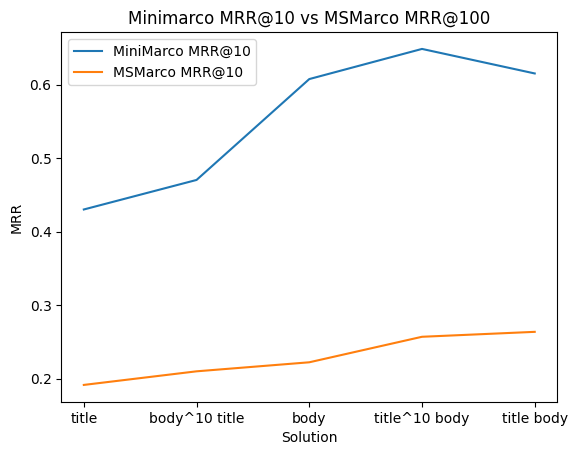

In [22]:
import matplotlib.pyplot as plt


x = np.arange(len(minimarco_mrr10_sorted))
plt.plot(x, minimarco_mrr10_sorted, label='MiniMarco MRR@10')
plt.plot(x, msmarco_mrr100_sorted, label='MSMarco MRR@10')

plt.title('Minimarco MRR@10 vs MSMarco MRR@100')
plt.xlabel('Solution')
plt.ylabel('MRR')
plt.xticks(x, labels[msmarco_sorted_idx])
plt.legend()
